In [1]:
# Import dependencies 
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Setup port
mongo = MongoClient(port=27017)

In [3]:
# Check database names
print(mongo.list_database_names())

['admin', 'autosaurus', 'classDB', 'config', 'epa', 'fruits_db', 'local', 'met', 'petsitly_marketing', 'project3', 'project3trend', 'travel_db', 'uk_food']


In [4]:
# Declare database and collection for the full database 
project3 = mongo['project3']
full_data = project3['full_data']

In [5]:
# Full data 
results = full_data.find()
results = list(results)

In [6]:
# Transform into DataFrame
full_data_df = pd.DataFrame(results)
full_data_df.head(10)

,_id,Case #,Shooter Last Name,Shooter First Name,Date,Year,City,State,Latitude,Longitude,...,Social Leakage�,Social Leakage How,Social Leakage Who�,Leakage Specific/Nonspecific�,Interest in Past Mass Violence,Relationship with Other Shooting(s),Specify Relationship to Other Shooting(s),Planning,Interest in Firearms,Criminal Sentence
0,642b5a8ac379276388779140,2,Smith,Robert,11/12/66,1966,Mesa,AZ,33.459937,-111.781900,...,0,NA,NA,NA,1,1,Happened a few months after the Charles Whitma...,1,0,1
1,642b5a8ac379276388779141,3,Held,Leo,10/23/67,1967,Lock Haven,PA,41.125184,-77.451878,...,0,NA,NA,NA,0,0,NA,0,1,0
2,642b5a8ac379276388779142,1,Whitman,Charles,8/1/66,1966,Austin,TX,30.286058,-97.739350,...,1,0,0,1,0,1,Robert Smith killed 5 people a few months afte...,1,1,0
3,642b5a8ac379276388779143,4,Pearson,Eric,3/16/68,1968,Ironwood,MI,46.535978,-90.156262,...,0,NA,NA,NA,0,0,NA,0,0,3
4,642b5a8ac379276388779144,5,Lambright,Donald,4/5/69,1969,Harrisburg,PA,40.103677,-75.755056,...,0,NA,NA,NA,0,0,NA,0,0,0
5,642b5a8ac379276388779145,6,White,Joseph,9/23/70,1970,Albany,NY,42.614852,-73.970812,...,0,NA,NA,NA,0,0,NA,0,0,0
6,642b5a8ac379276388779146,7,McLeod,Harvey Glenn,5/29/72,1972,Raleigh,NC,35.837199,-78.642979,...,0,NA,NA,NA,0,0,NA,0,0,0
7,642b5a8ac379276388779147,8,Grace,Edwin,6/21/72,1972,Cherry Hill,NJ,39.927991,-74.994341,...,0,NA,NA,NA,0,0,NA,0,0,0
8,642b5a8ac379276388779148,9,Essex,Mark,1/7/73,1973,New Orleans�,LA,30.002426,-90.038906,...,1,"1, 1","9, 1","1, 0",0,0,NA,1,0,0
9,642b5a8ac379276388779149,10,Sander,Robert,3/2/75,1975,Smith River,CA,41.949285,-124.199492,...,0,NA,NA,NA,0,0,NA,0,0,0


In [7]:
# Find column names
full_data_df.columns

Index(['_id', 'Case #', 'Shooter Last Name', 'Shooter First Name', 'Date',
       'Year', 'City', 'State', 'Latitude', 'Longitude', 'Killed', 'Injured',
       'Perpetrator Age', 'Perpetrator Gender', 'Location',
       'Total Firearms Brought to the Scene', 'Make and Model',
       'Urban/Suburban/Rural', 'Perpetrator Race', 'Military Service',
       'Military Branch', 'Perpetrator Known to Police or FBI',
       'Perpetrator Criminal Record', 'Perpetrator Part I Crimes',
       'Perpetrator Part II Crimes', 'Recent or Ongoing Stressor',
       'Signs of Being in Crisis', 'Timeline of Signs of Crisis',
       'Signs of Crisis Expanded', 'Inability to Perform Daily Tasks',
       'Notably Depressed Mood', 'Unusually Calm or Happy',
       'Rapid Mood Swings', 'Increased Agitation', 'Abusive Behavior',
       'Isolation', 'Losing Touch with Reality', 'Paranoia', 'Suicidality',
       'Prior Hospitalization', 'Voluntary or Involuntary Hospitalization',
       'Prior Counseling', 'Volunt

In [8]:
# Pair down to only relevant columns
full_data_df = full_data_df[['Case #', 'Shooter Last Name', 'Shooter First Name', 'Date', 'Year',
       'City', 'State','Killed', 'Injured',
       'Perpetrator Age', 'Perpetrator Gender', 'Location',
       'Total Firearms Brought to the Scene', 'Make and Model',
       'Perpetrator Race', 'Perpetrator Known to Police or FBI',
       'Perpetrator Criminal Record', 'Perpetrator Part I Crimes',
       'Perpetrator Part II Crimes', 'Mental Illness','Social Media Use�',
       'Social Leakage�','Interest in Past Mass Violence',
       'Relationship with Other Shooting(s)',
       'Specify Relationship to Other Shooting(s)']]

In [9]:
# Check data
full_data_df.head()

,Case #,Shooter Last Name,Shooter First Name,Date,Year,City,State,Killed,Injured,Perpetrator Age,...,Perpetrator Known to Police or FBI,Perpetrator Criminal Record,Perpetrator Part I Crimes,Perpetrator Part II Crimes,Mental Illness,Social Media Use�,Social Leakage�,Interest in Past Mass Violence,Relationship with Other Shooting(s),Specify Relationship to Other Shooting(s)
0,2,Smith,Robert,11/12/66,1966,Mesa,AZ,5,2,18,...,0,0,0,0,2,2,0,1,1,Happened a few months after the Charles Whitma...
1,3,Held,Leo,10/23/67,1967,Lock Haven,PA,6,6,39,...,1,0,0,1,4,2,0,0,0,NA
2,1,Whitman,Charles,8/1/66,1966,Austin,TX,15,31,25,...,0,1,0,9,1,2,1,0,1,Robert Smith killed 5 people a few months afte...
3,4,Pearson,Eric,3/16/68,1968,Ironwood,MI,7,2,56,...,0,0,0,0,0,2,0,0,0,NA
4,5,Lambright,Donald,4/5/69,1969,Harrisburg,PA,4,17,31,...,0,0,0,0,2,2,0,0,0,NA


In [10]:
# Get data types
full_data_df.dtypes

Case #                                       object
Shooter Last Name                            object
Shooter First Name                           object
Date                                         object
Year                                          int64
City                                         object
State                                        object
Killed                                        int64
Injured                                       int64
Perpetrator Age                              object
Perpetrator Gender                           object
Location                                      int64
Total Firearms Brought to the Scene          object
Make and Model                               object
Perpetrator Race                             object
Perpetrator Known to Police or FBI           object
Perpetrator Criminal Record                  object
Perpetrator Part I Crimes                    object
Perpetrator Part II Crimes                   object
Mental Illne

In [11]:
# Change age to float
full_data_df['Perpetrator Age'] = pd.to_numeric(full_data_df['Perpetrator Age'], errors='coerce')

In [12]:
# Get data types
full_data_df.dtypes

Case #                                        object
Shooter Last Name                             object
Shooter First Name                            object
Date                                          object
Year                                           int64
City                                          object
State                                         object
Killed                                         int64
Injured                                        int64
Perpetrator Age                              float64
Perpetrator Gender                            object
Location                                       int64
Total Firearms Brought to the Scene           object
Make and Model                                object
Perpetrator Race                              object
Perpetrator Known to Police or FBI            object
Perpetrator Criminal Record                   object
Perpetrator Part I Crimes                     object
Perpetrator Part II Crimes                    

In [13]:
# Drop NA 
full_data_df = full_data_df.dropna()
full_data_df

,Case #,Shooter Last Name,Shooter First Name,Date,Year,City,State,Killed,Injured,Perpetrator Age,...,Perpetrator Known to Police or FBI,Perpetrator Criminal Record,Perpetrator Part I Crimes,Perpetrator Part II Crimes,Mental Illness,Social Media Use�,Social Leakage�,Interest in Past Mass Violence,Relationship with Other Shooting(s),Specify Relationship to Other Shooting(s)
0,2,Smith,Robert,11/12/66,1966,Mesa,AZ,5,2,18.0,...,0,0,0,0,2,2,0,1,1,Happened a few months after the Charles Whitma...
1,3,Held,Leo,10/23/67,1967,Lock Haven,PA,6,6,39.0,...,1,0,0,1,4,2,0,0,0,NA
2,1,Whitman,Charles,8/1/66,1966,Austin,TX,15,31,25.0,...,0,1,0,9,1,2,1,0,1,Robert Smith killed 5 people a few months afte...
3,4,Pearson,Eric,3/16/68,1968,Ironwood,MI,7,2,56.0,...,0,0,0,0,0,2,0,0,0,NA
4,5,Lambright,Donald,4/5/69,1969,Harrisburg,PA,4,17,31.0,...,0,0,0,0,2,2,0,0,0,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,186,Louis,Michael,6/1/22,2022,Tulsa,OK,4,0,45.0,...,0,0,0,0,0,0,0,0,0,NA
185,187,Crimo,Robert,7/4/22,2022,Highland Park,IL,7,46,21.0,...,1,0,0,0,4,1,1,1,0,NA
186,188,Thompson,Austin,10/13/22,2022,Raleigh,NC,5,2,15.0,...,0,0,0,0,0,0,0,0,0,NA
187,189,Aldrich,Anderson�,11/19-20/2022,2022,Colorado Springs,CO,5,19,22.0,...,1,0,0,0,4,0,1,1,0,NA


In [14]:
# SOCIAL MEDIA USAGE
# DF for social media
df_social = full_data_df.loc[full_data_df['Social Media Use�'] == 1]
df_no_social = full_data_df.loc[full_data_df['Social Media Use�'] == 0]

In [15]:
# Count of age
count_social = df_social.groupby('Year').count()['Case #']
count_no_social = df_no_social.groupby('Year').count()['Case #']

In [16]:
# Data frame creation
social_data = {'Intent Not Shared on Social Media': count_no_social,
              'Intent Shared on Social Media': count_social}
social_data_df = pd.DataFrame(social_data)
social_data_df

,Intent Not Shared on Social Media,Intent Shared on Social Media
Year,,
1999,7,1.0
2000,1,2.0
2001,4,NaN
2002,1,NaN
2003,4,NaN
2004,3,NaN
2005,2,2.0
2006,3,1.0
2007,3,1.0


In [17]:
# Set labels
social_media_names = ['Intent Not Shared on Social Media','Intent Shared on Social Media']

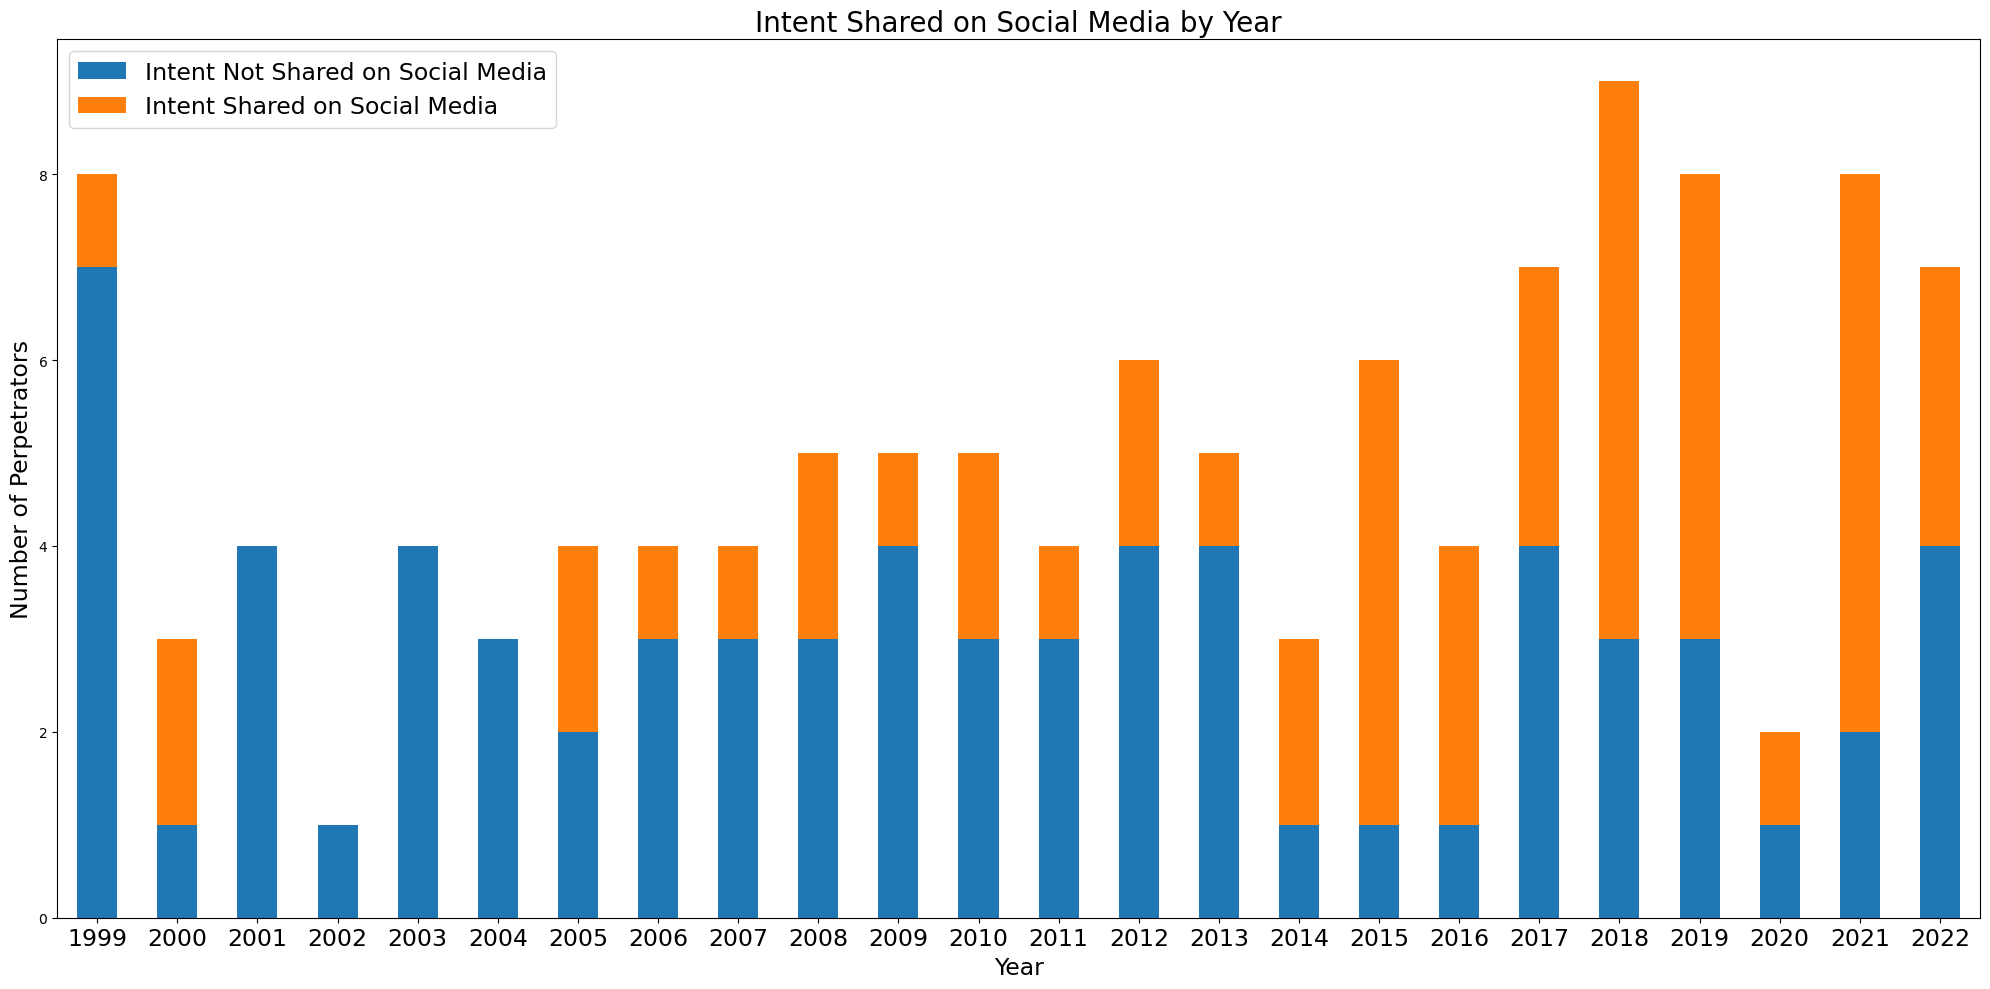

In [18]:
# Graph data 
social_data_df.plot.bar(stacked=True, figsize = (20, 10))
plt.legend(labels = social_media_names)
plt.xlabel("Year", fontsize = 17)
plt.ylabel("Number of Perpetrators", fontsize = 17)
plt.title("Intent Shared on Social Media by Year", fontsize = 20)
plt.xticks(rotation='horizontal', fontsize = 17)
plt.legend(fontsize = 17)
plt.tight_layout()
plt.savefig('images/social_media_intent.png')

In [19]:
# Find max age 
full_data_df['Perpetrator Age'].max()

70.0

In [20]:
# Create bins for age groups
bins = [0, 19.9, 29.9, 39.9, 49.9, 59.9, 69.9, 79.9]

group_names = ["Under 20", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]

In [21]:
# Cut data into bins
full_data_df['Perpetrator Age'] = pd.cut(full_data_df['Perpetrator Age'], bins, labels=group_names, include_lowest=True)
full_data_df.head()

,Case #,Shooter Last Name,Shooter First Name,Date,Year,City,State,Killed,Injured,Perpetrator Age,...,Perpetrator Known to Police or FBI,Perpetrator Criminal Record,Perpetrator Part I Crimes,Perpetrator Part II Crimes,Mental Illness,Social Media Use�,Social Leakage�,Interest in Past Mass Violence,Relationship with Other Shooting(s),Specify Relationship to Other Shooting(s)
0,2,Smith,Robert,11/12/66,1966,Mesa,AZ,5,2,Under 20,...,0,0,0,0,2,2,0,1,1,Happened a few months after the Charles Whitma...
1,3,Held,Leo,10/23/67,1967,Lock Haven,PA,6,6,30-39,...,1,0,0,1,4,2,0,0,0,NA
2,1,Whitman,Charles,8/1/66,1966,Austin,TX,15,31,20-29,...,0,1,0,9,1,2,1,0,1,Robert Smith killed 5 people a few months afte...
3,4,Pearson,Eric,3/16/68,1968,Ironwood,MI,7,2,50-59,...,0,0,0,0,0,2,0,0,0,NA
4,5,Lambright,Donald,4/5/69,1969,Harrisburg,PA,4,17,30-39,...,0,0,0,0,2,2,0,0,0,NA


In [22]:
# Get year list
full_data_df['Year'].unique()

array([1966, 1967, 1968, 1969, 1970, 1972, 1973, 1975, 1976, 1977, 1978,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2003, 2004, 2005, 2002, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [23]:
# Create year bins
bins2 = [0, 1970, 1980, 1990, 2000, 2010, 2020, 2023]

group_names2 = ["1960s", "1970s", "1980s", "1990s", "2000s", "2010s", "2020 to 2022"]

In [24]:
# Cut data into bins
full_data_df['Year'] = pd.cut(full_data_df['Year'], bins2, labels=group_names2, include_lowest=True)
full_data_df

,Case #,Shooter Last Name,Shooter First Name,Date,Year,City,State,Killed,Injured,Perpetrator Age,...,Perpetrator Known to Police or FBI,Perpetrator Criminal Record,Perpetrator Part I Crimes,Perpetrator Part II Crimes,Mental Illness,Social Media Use�,Social Leakage�,Interest in Past Mass Violence,Relationship with Other Shooting(s),Specify Relationship to Other Shooting(s)
0,2,Smith,Robert,11/12/66,1960s,Mesa,AZ,5,2,Under 20,...,0,0,0,0,2,2,0,1,1,Happened a few months after the Charles Whitma...
1,3,Held,Leo,10/23/67,1960s,Lock Haven,PA,6,6,30-39,...,1,0,0,1,4,2,0,0,0,NA
2,1,Whitman,Charles,8/1/66,1960s,Austin,TX,15,31,20-29,...,0,1,0,9,1,2,1,0,1,Robert Smith killed 5 people a few months afte...
3,4,Pearson,Eric,3/16/68,1960s,Ironwood,MI,7,2,50-59,...,0,0,0,0,0,2,0,0,0,NA
4,5,Lambright,Donald,4/5/69,1960s,Harrisburg,PA,4,17,30-39,...,0,0,0,0,2,2,0,0,0,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,186,Louis,Michael,6/1/22,2020 to 2022,Tulsa,OK,4,0,40-49,...,0,0,0,0,0,0,0,0,0,NA
185,187,Crimo,Robert,7/4/22,2020 to 2022,Highland Park,IL,7,46,20-29,...,1,0,0,0,4,1,1,1,0,NA
186,188,Thompson,Austin,10/13/22,2020 to 2022,Raleigh,NC,5,2,Under 20,...,0,0,0,0,0,0,0,0,0,NA
187,189,Aldrich,Anderson�,11/19-20/2022,2020 to 2022,Colorado Springs,CO,5,19,20-29,...,1,0,0,0,4,0,1,1,0,NA


In [25]:
# AGE GRAPH
# DF for age
df_under20 = full_data_df.loc[full_data_df['Perpetrator Age'] == 'Under 20']
df_20_29 = full_data_df.loc[full_data_df['Perpetrator Age'] == "20-29"]
df_30_39 = full_data_df.loc[full_data_df['Perpetrator Age'] == "30-39"]
df_40_49 = full_data_df.loc[full_data_df['Perpetrator Age'] == "40-49"]
df_50_59 = full_data_df.loc[full_data_df['Perpetrator Age'] == "50-59"]
df_60_69 = full_data_df.loc[full_data_df['Perpetrator Age'] == "60-69"]
df_70_79 = full_data_df.loc[full_data_df['Perpetrator Age'] == "70-79"]

In [26]:
# Count of age
count_under20 = df_under20.groupby('Year').count()['Case #']
count_20_29 = df_20_29.groupby('Year').count()['Case #']
count_30_39 = df_30_39.groupby('Year').count()['Case #']
count_40_49 = df_40_49.groupby('Year').count()['Case #']
count_50_59 = df_50_59.groupby('Year').count()['Case #']
count_60_69 = df_60_69.groupby('Year').count()['Case #']
count_70_79 = df_70_79.groupby('Year').count()['Case #']

In [27]:
# Data frame creation
data = {'Under 20': count_under20, 
       '20 to 29': count_20_29,
       '30 to 39': count_30_39,
       '40 to 49': count_40_49,
       '50 to 59': count_50_59,
       '60 to 69': count_60_69,
       '70 to 79': count_70_79}
age_count_df = pd.DataFrame(data)
age_count_df

,Under 20,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79
Year,,,,,,,
1960s,1,2,2,0,1,0,0
1970s,0,7,3,2,0,0,0
1980s,0,5,6,7,1,1,1
1990s,8,10,9,10,3,1,0
2000s,3,14,9,7,5,1,0
2010s,3,24,7,14,4,2,0
2020 to 2022,5,4,2,3,1,0,0


In [28]:
total_cases = full_data_df.groupby('Year').count()['Case #']
total_cases 

Year
1960s            6
1970s           12
1980s           21
1990s           41
2000s           39
2010s           54
2020 to 2022    15
Name: Case #, dtype: int64

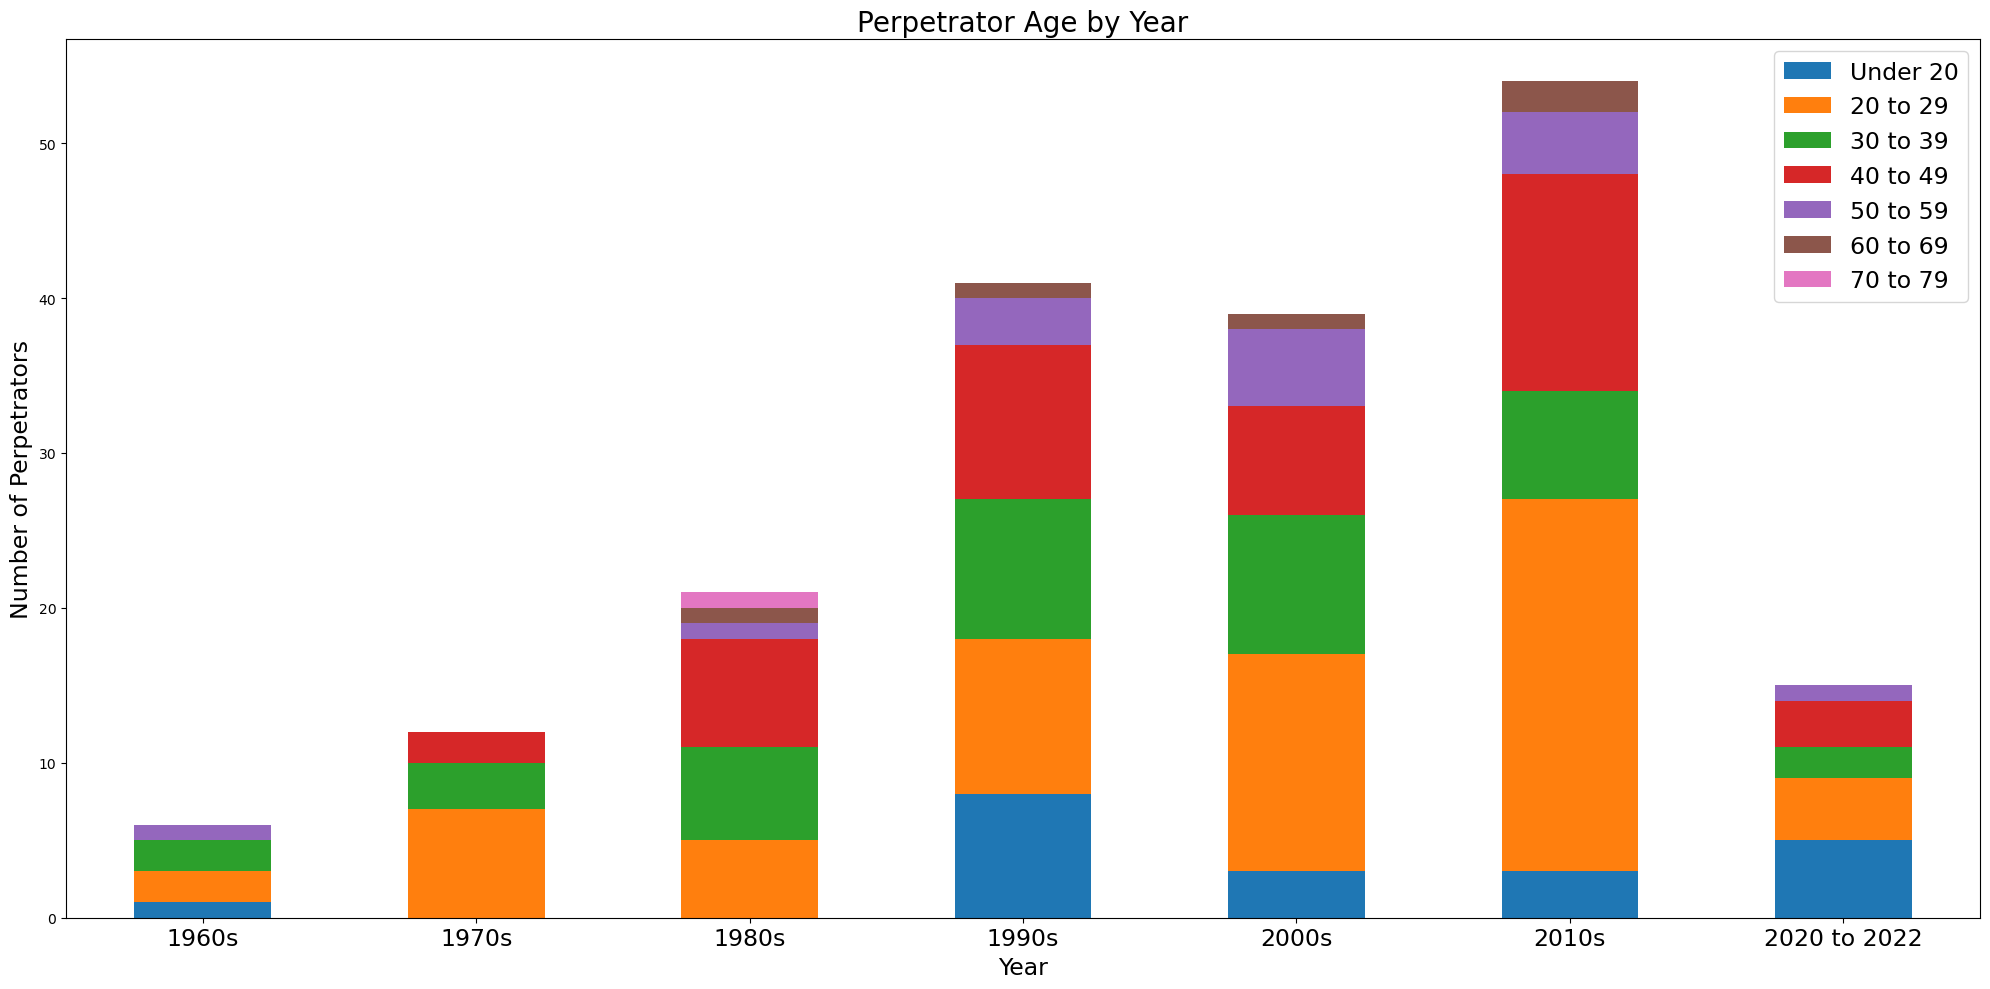

In [29]:
# Graph data 
age_count_df.plot.bar(stacked=True, figsize = (20, 10))
plt.legend(labels = group_names)
plt.xlabel("Year", fontsize = 17)
plt.ylabel("Number of Perpetrators", fontsize = 17)
plt.title("Perpetrator Age by Year", fontsize = 20)
plt.xticks(rotation='horizontal', fontsize = 17)
plt.legend(fontsize = 17)
plt.tight_layout()
plt.savefig('images/perps_by_year.png')

In [30]:
# GENDER GRAPH
# DF for age
df_male = full_data_df.loc[full_data_df['Perpetrator Gender'] == 0]
df_female = full_data_df.loc[full_data_df['Perpetrator Gender'] == 1]
df_nonbinary = full_data_df.loc[full_data_df['Perpetrator Gender'] == 3]

In [31]:
# Count of gender
count_male = df_male.groupby('Year').count()['Case #']
count_female = df_female.groupby('Year').count()['Case #']
count_nonbinary = df_nonbinary.groupby('Year').count()['Case #']
count_male


Year
1960s            6
1970s           12
1980s           21
1990s           41
2000s           38
2010s           51
2020 to 2022    14
Name: Case #, dtype: int64

In [32]:
# Data frame creation
data2 = {'Male': count_male, 
       'Female': count_female,
       'Nonbinary': count_nonbinary}
gender_count_df = pd.DataFrame(data2)
gender_count_df.head()

,Male,Female,Nonbinary
Year,,,
1960s,6,0,0
1970s,12,0,0
1980s,21,0,0
1990s,41,0,0
2000s,38,1,0


In [33]:
# Create label names
gender_names = ["Male", "Female", "Nonbinary"]

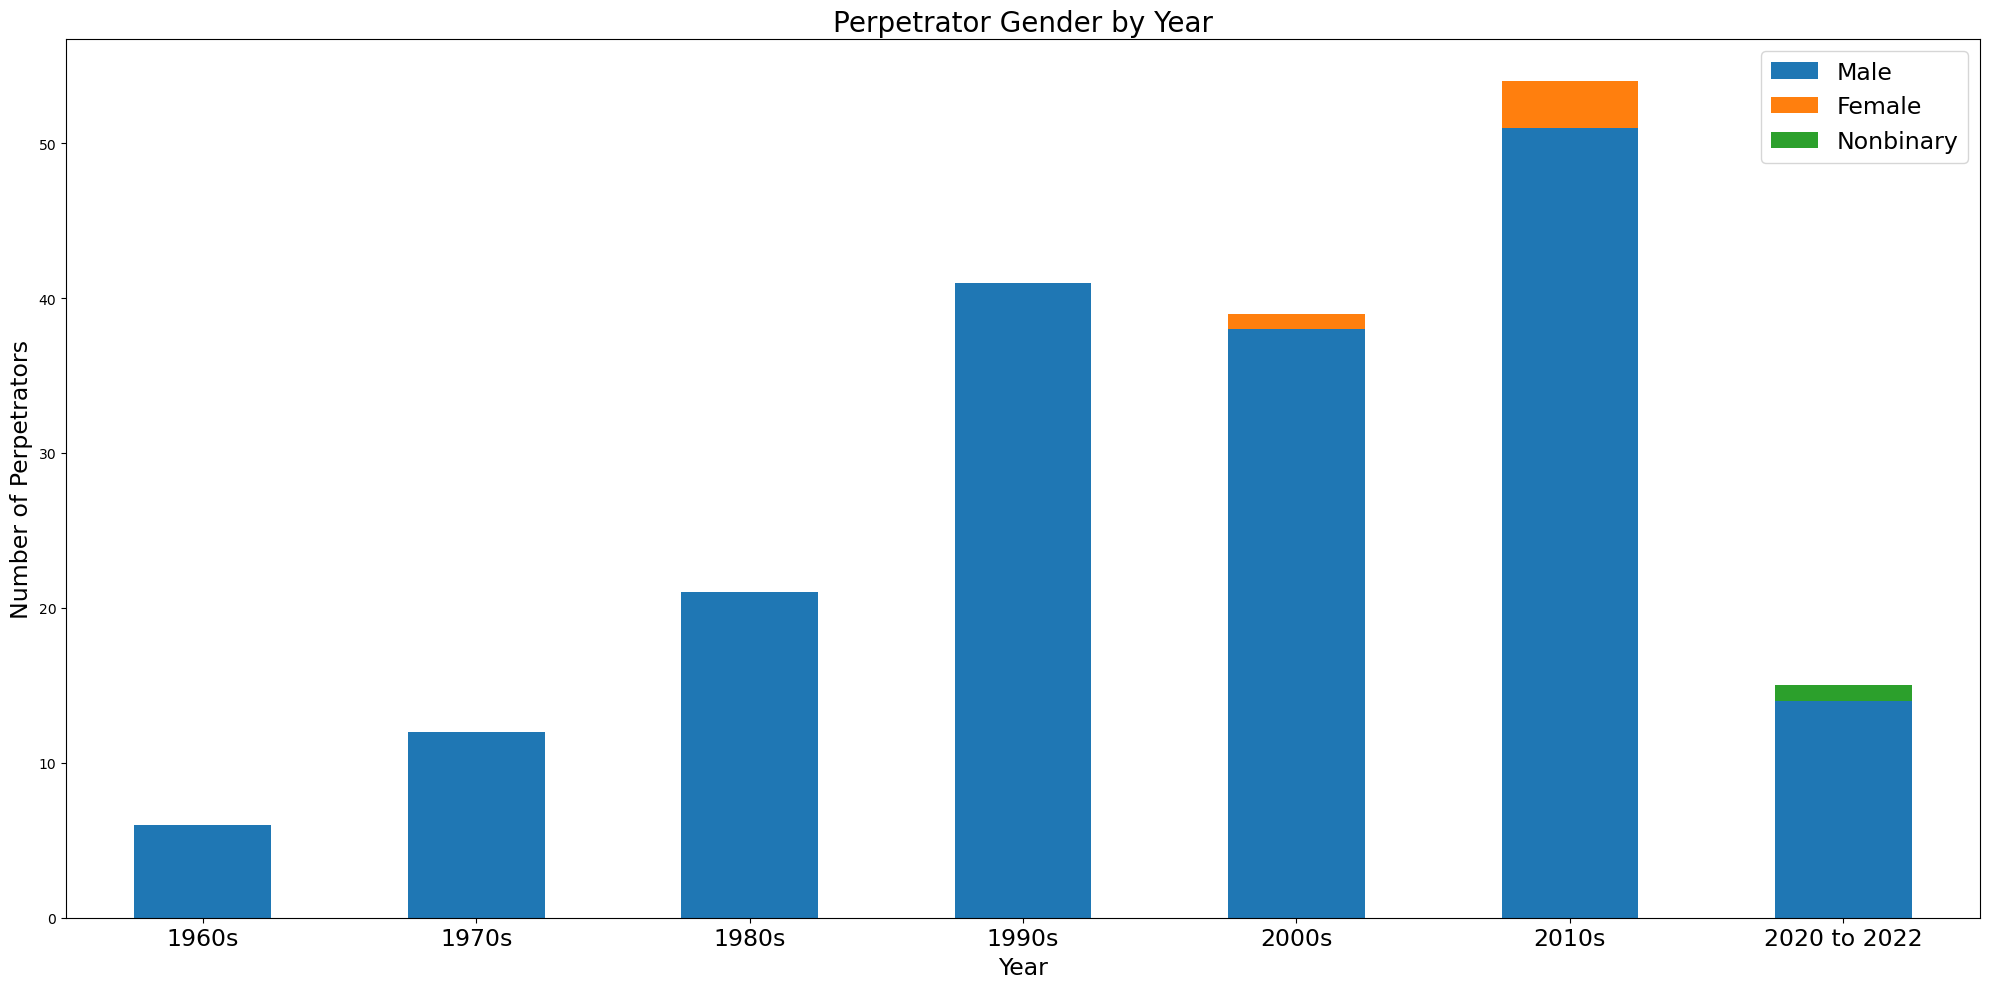

In [34]:
# Graph data 
gender_count_df.plot.bar(stacked=True, figsize = (20, 10))
plt.legend(labels = gender_names)
plt.xlabel("Year", fontsize = 17)
plt.ylabel("Number of Perpetrators", fontsize = 17)
plt.title("Perpetrator Gender by Year", fontsize = 20)
plt.xticks(rotation='horizontal', fontsize = 17)
plt.legend(fontsize = 17)
plt.tight_layout()
plt.savefig('images/gender_by_year.png')

In [35]:
# SOCIAL LEAKAGE GRAPH
# DF for social leakage
df_no_leakage = full_data_df.loc[full_data_df['Social Leakage�'] == 0]
df_leakage = full_data_df.loc[full_data_df['Social Leakage�'] == 1]

In [36]:
# Count of social leakage
count_no_leakage = df_no_leakage.groupby('Year').count()['Case #']
count_leakage = df_leakage.groupby('Year').count()['Case #']

In [37]:
# Data frame creation
data3 = {'No Communication to a Third Party to Leak Intent': count_no_leakage, 
        'Communication to a Third Party to Leak Intent': count_leakage}
social_leakage_df = pd.DataFrame(data3)
social_leakage_df

,No Communication to a Third Party to Leak Intent,Communication to a Third Party to Leak Intent
Year,,
1960s,5,1
1970s,9,3
1980s,10,11
1990s,22,19
2000s,19,20
2010s,31,23
2020 to 2022,7,8


In [38]:
# Labels 
social_leakage_labels = ['No Communication to a Third Party to Leak Intent', 'Communication to a Third Party to Leak Intent']

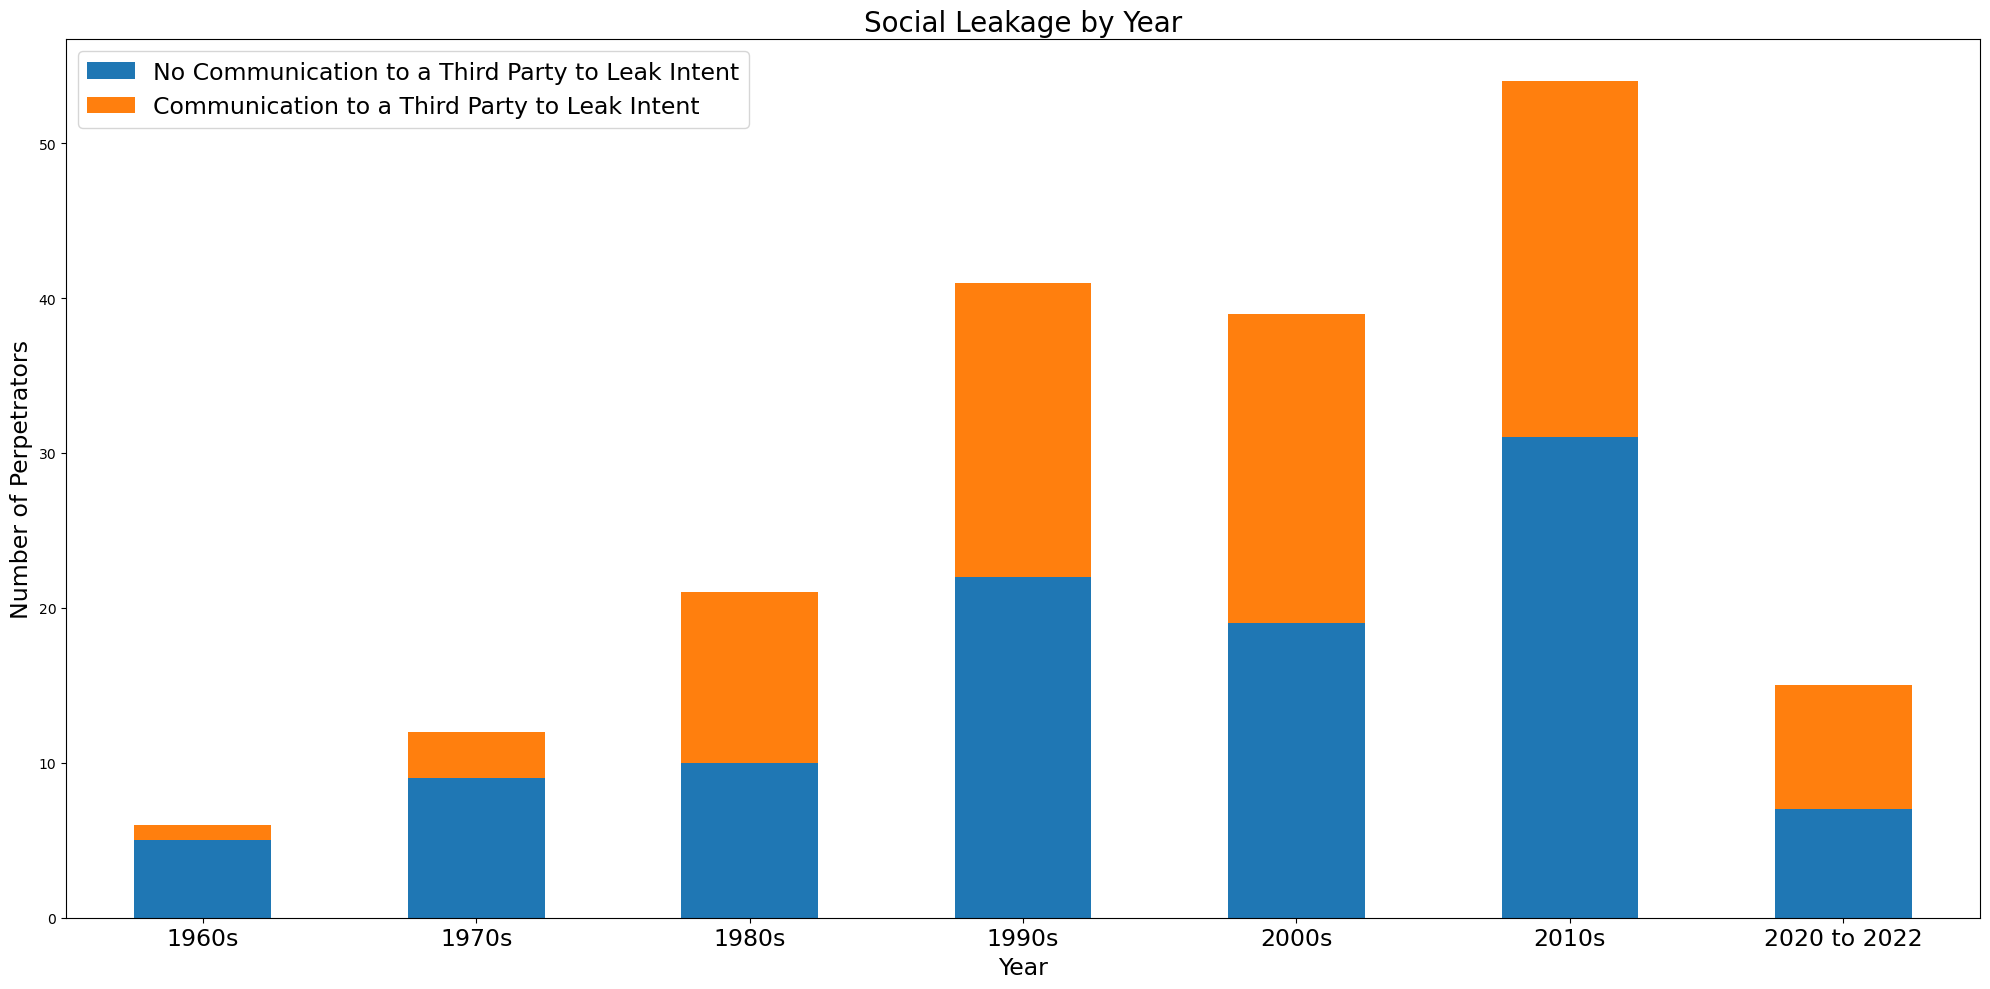

In [39]:
# Graph data 
social_leakage_df.plot.bar(stacked=True, figsize = (20, 10))
plt.legend(labels = social_leakage_labels)
plt.xlabel("Year", fontsize = 17)
plt.ylabel("Number of Perpetrators", fontsize = 17)
plt.title("Social Leakage by Year", fontsize = 20)
plt.xticks(rotation='horizontal', fontsize = 17)
plt.legend(fontsize = 17)
plt.tight_layout()
plt.savefig('images/social_leakage_by_year.png')

In [40]:
# SOCIAL MEDIA GRAPH
# DF for social media
df_no_social_media = full_data_df.loc[full_data_df['Social Leakage�'] == 0]
df_social_media = full_data_df.loc[full_data_df['Social Leakage�'] == 1]

In [41]:
# Count of social leakage
count_no_social_media = df_no_social_media.groupby('Year').count()['Case #']
count_social_media = df_social_media .groupby('Year').count()['Case #']

In [42]:
# Data frame creation
data4 = {'No Intent Shared on Social Media': count_no_social_media,
        'Intent Shared on Social Media': count_social_media}
social_media_df = pd.DataFrame(data4)
social_media_df

,No Intent Shared on Social Media,Intent Shared on Social Media
Year,,
1960s,5,1
1970s,9,3
1980s,10,11
1990s,22,19
2000s,19,20
2010s,31,23
2020 to 2022,7,8


In [43]:
# Create labels
social_media_labels = ['No Intent Shared on Social Media', 'Intent Shared on Social Media']

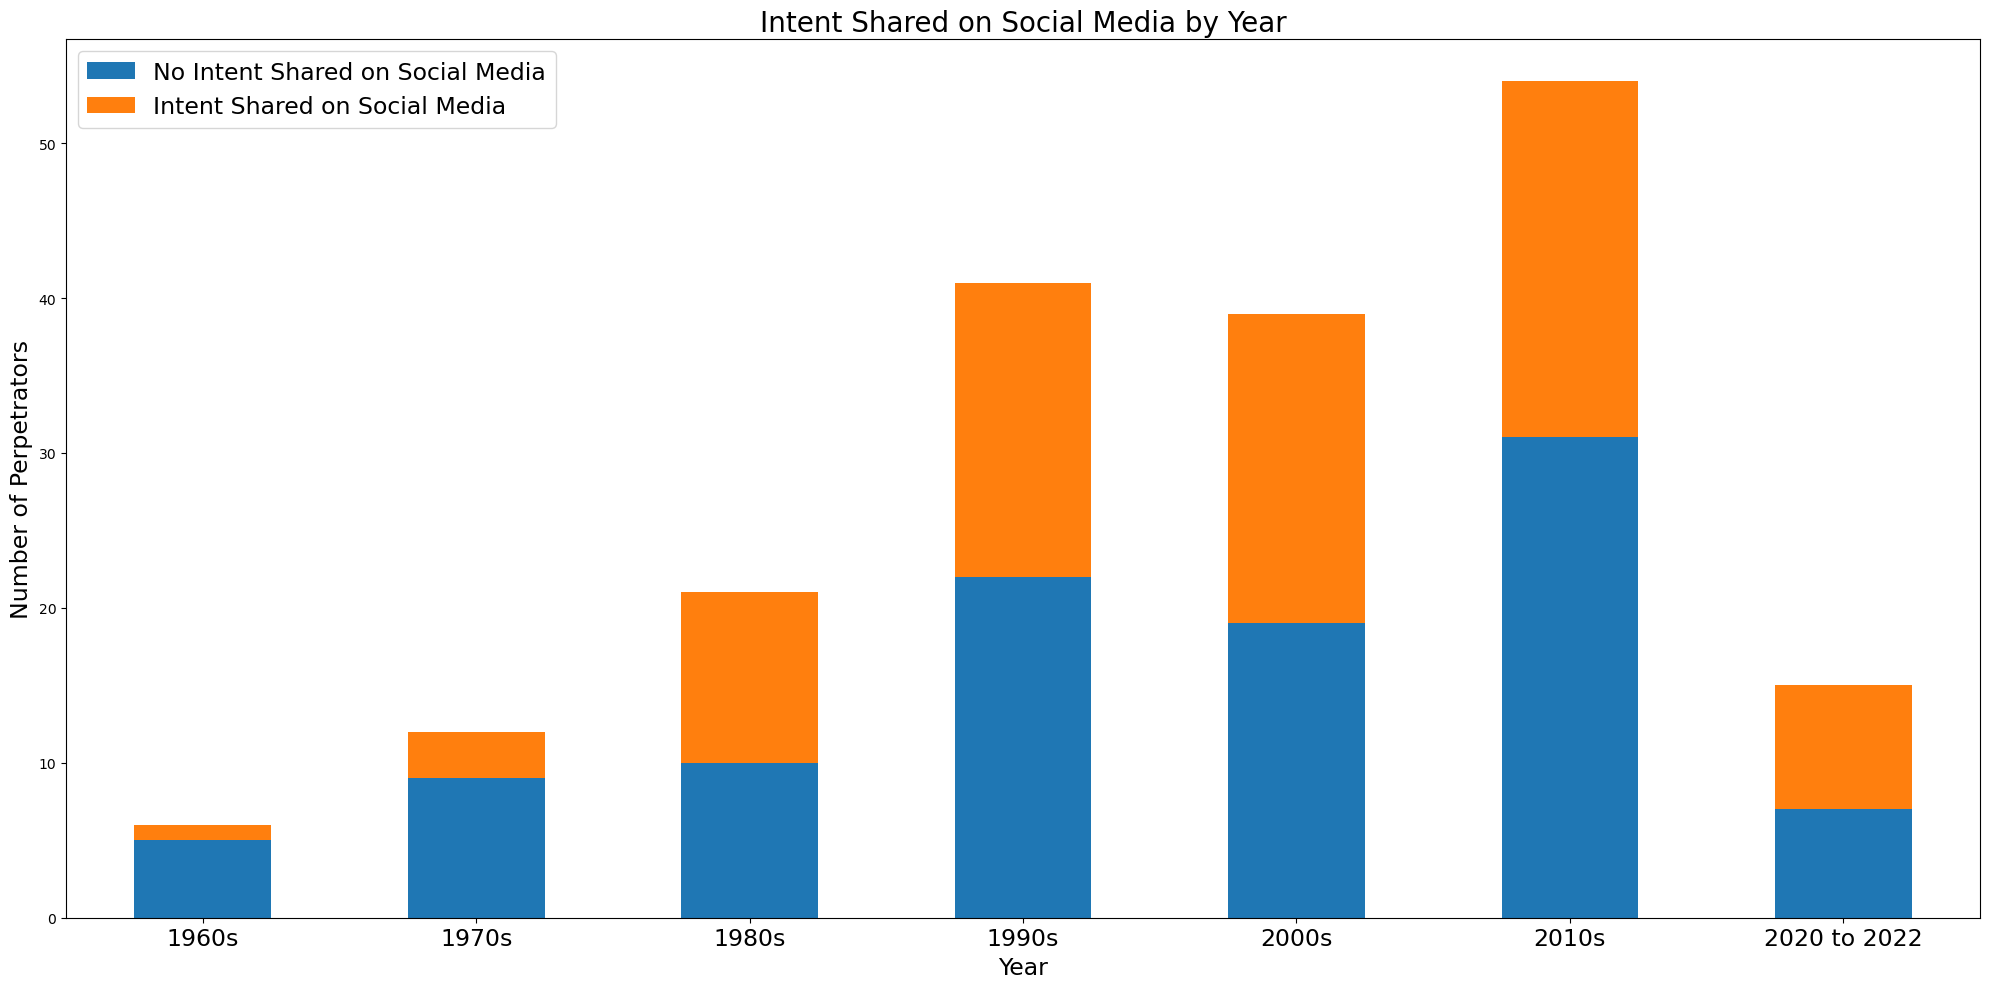

In [44]:
# Graph data 
social_media_df.plot.bar(stacked=True, figsize = (20, 10))
plt.legend(labels = social_media_labels)
plt.xlabel("Year", fontsize = 17)
plt.ylabel("Number of Perpetrators", fontsize = 17)
plt.title("Intent Shared on Social Media by Year", fontsize = 20)
plt.xticks(rotation='horizontal', fontsize = 17)
plt.legend(fontsize = 17)
plt.tight_layout()
plt.savefig('images/social_media_by_year.png')

In [45]:
# Get data types
full_data_df.dtypes

Case #                                         object
Shooter Last Name                              object
Shooter First Name                             object
Date                                           object
Year                                         category
City                                           object
State                                          object
Killed                                          int64
Injured                                         int64
Perpetrator Age                              category
Perpetrator Gender                             object
Location                                        int64
Total Firearms Brought to the Scene            object
Make and Model                                 object
Perpetrator Race                               object
Perpetrator Known to Police or FBI             object
Perpetrator Criminal Record                    object
Perpetrator Part I Crimes                      object
Perpetrator Part II Crimes  

In [46]:
# Change age to float
full_data_df['Mental Illness'] = pd.to_numeric(full_data_df['Mental Illness'], errors='coerce')

In [47]:
full_data_df['Mental Illness'].value_counts()

0.0    58
4.0    45
2.0    31
1.0    28
3.0     9
Name: Mental Illness, dtype: int64

In [48]:
# Create year bins
bins3 = [0, 1, 4]

group_names3 = ["No Indication of Mental Illness", "Indication or Diagnosis of Mental Illness"]

In [49]:
# Cut data into bins
full_data_df['Mental Illness'] = pd.cut(full_data_df['Mental Illness'], bins3, labels=group_names3, include_lowest=True)
full_data_df.head()

,Case #,Shooter Last Name,Shooter First Name,Date,Year,City,State,Killed,Injured,Perpetrator Age,...,Perpetrator Known to Police or FBI,Perpetrator Criminal Record,Perpetrator Part I Crimes,Perpetrator Part II Crimes,Mental Illness,Social Media Use�,Social Leakage�,Interest in Past Mass Violence,Relationship with Other Shooting(s),Specify Relationship to Other Shooting(s)
0,2,Smith,Robert,11/12/66,1960s,Mesa,AZ,5,2,Under 20,...,0,0,0,0,Indication or Diagnosis of Mental Illness,2,0,1,1,Happened a few months after the Charles Whitma...
1,3,Held,Leo,10/23/67,1960s,Lock Haven,PA,6,6,30-39,...,1,0,0,1,Indication or Diagnosis of Mental Illness,2,0,0,0,NA
2,1,Whitman,Charles,8/1/66,1960s,Austin,TX,15,31,20-29,...,0,1,0,9,No Indication of Mental Illness,2,1,0,1,Robert Smith killed 5 people a few months afte...
3,4,Pearson,Eric,3/16/68,1960s,Ironwood,MI,7,2,50-59,...,0,0,0,0,No Indication of Mental Illness,2,0,0,0,NA
4,5,Lambright,Donald,4/5/69,1960s,Harrisburg,PA,4,17,30-39,...,0,0,0,0,Indication or Diagnosis of Mental Illness,2,0,0,0,NA


In [50]:
# MENTAL STATE
# DF for mental state
df_no_ment_illness = full_data_df.loc[full_data_df['Mental Illness'] == 'No Indication of Mental Illness']
df_ment_illness = full_data_df.loc[full_data_df['Mental Illness'] == 'Indication or Diagnosis of Mental Illness']

In [51]:
# Count of mentall illness
count_no_ment_illness = df_no_ment_illness.groupby('Year').count()['Case #']
count_ment_illness = df_ment_illness .groupby('Year').count()['Case #']

In [52]:
# Data frame creation
ment_ill_data = {'Presence of Mental Illness': count_ment_illness, 
       'No Presence of Mental Illness': count_no_ment_illness}
ment_ill_df = pd.DataFrame(ment_ill_data)
ment_ill_df

,Presence of Mental Illness,No Presence of Mental Illness
Year,,
1960s,3,3
1970s,6,6
1980s,10,10
1990s,19,18
2000s,13,20
2010s,25,24
2020 to 2022,9,5


In [53]:
# Create labels
ment_ill_labels = ['Indication or Diagnosis of Mental Illness', 'No Indication of Mental Illness']

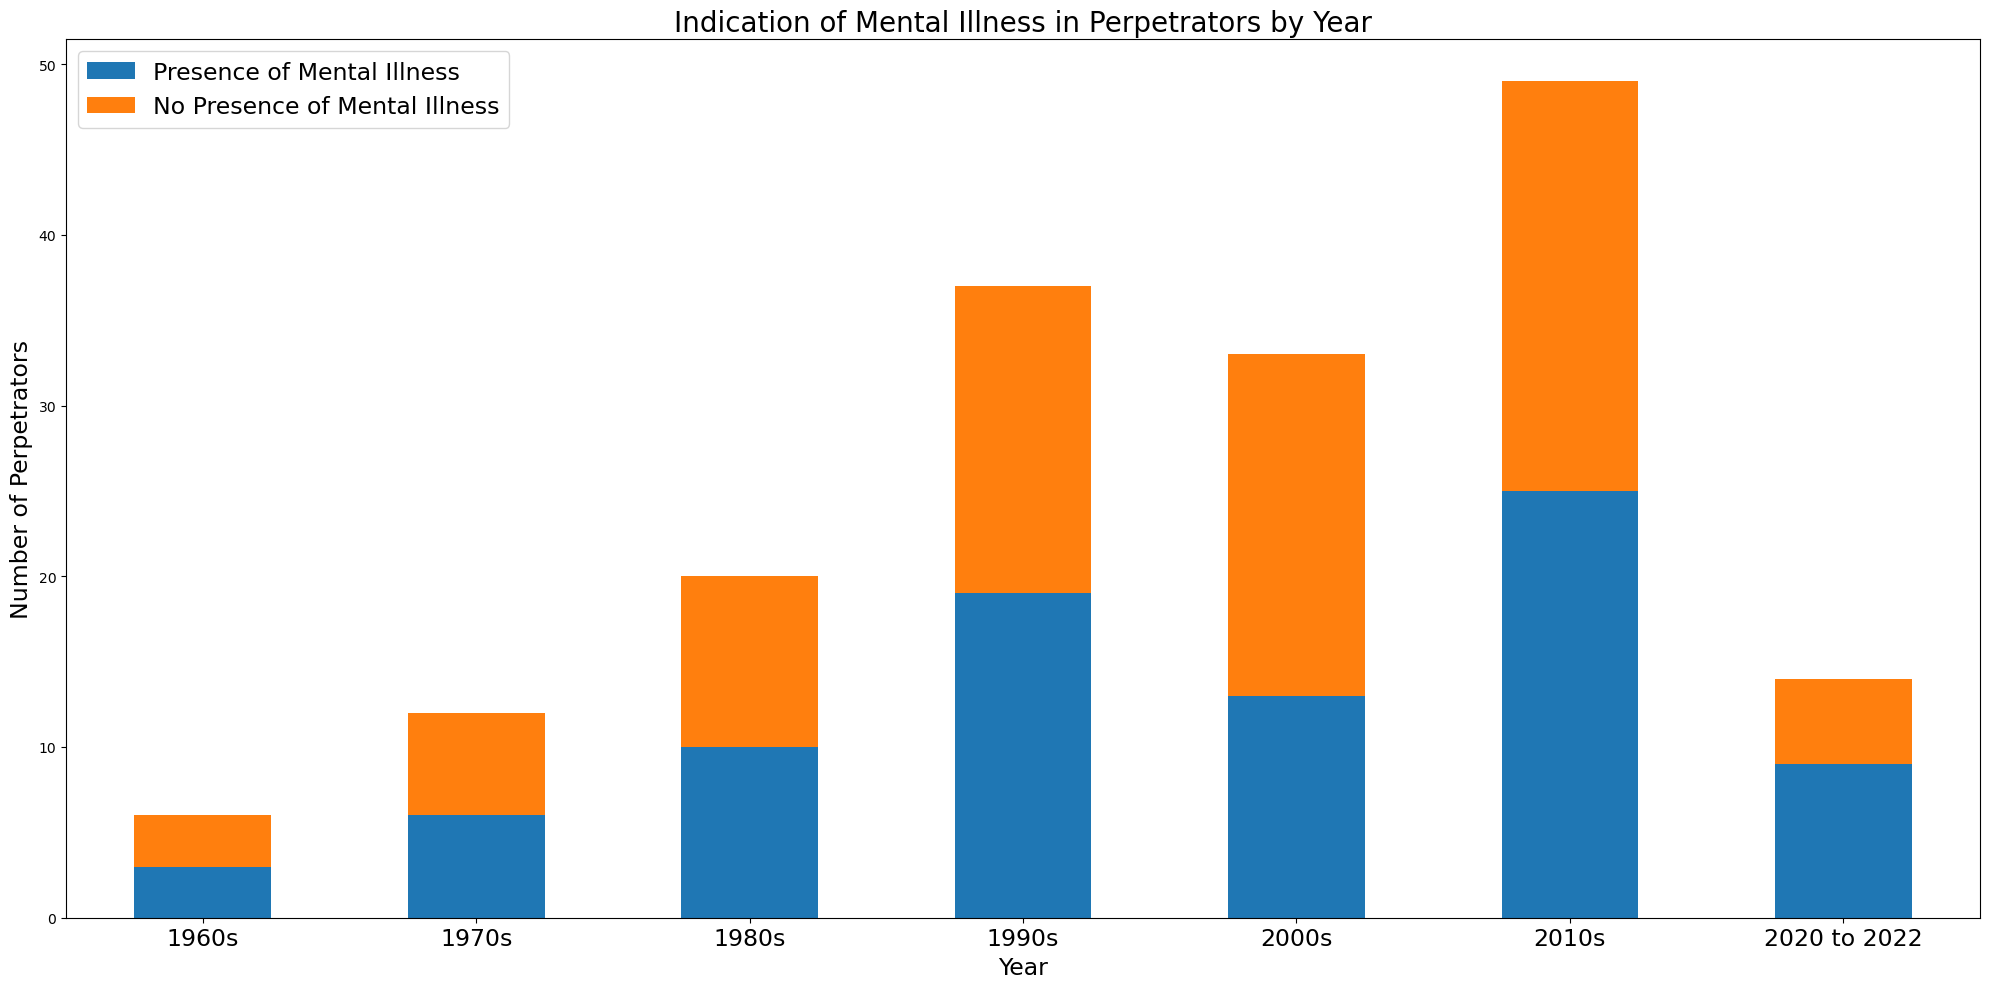

In [54]:
# Graph data 
ment_ill_df.plot.bar(stacked=True, figsize = (20, 10))
plt.legend(labels = ment_ill_labels)
plt.xlabel("Year", fontsize = 17)
plt.ylabel("Number of Perpetrators", fontsize = 17)
plt.title("Indication of Mental Illness in Perpetrators by Year", fontsize = 20)
plt.xticks(rotation='horizontal', fontsize = 17)
plt.legend(fontsize = 17)
plt.tight_layout()
plt.savefig('images/mental_illness_by_year.png')

In [55]:
# TREND DATA
# Declare database and collection for the trend data
project3trend = mongo['project3trend']
trend_data = project3trend['trend_data']

In [56]:
trend_results = trend_data.find()
trend_results = list(trend_results)

In [57]:
# Transform into DataFrame
trend_data_df = pd.DataFrame(trend_results)
trend_data_df.head(10)

,_id,Year,US Population (Census),Total US Murders (FBI UCR),US Murder Rate per Million,Mass Shootings (Incidents),Mass Shooting Rate Per Million,Mass Shooting Yearly Growth Rate (Incidents),Mass Shooting 3 Year Average (Incidents),Mass Shooting 5 Year Average (Incidents),Mass Shooting 10 Year Average (Incidents),Mass Shooting Deaths (Total),Deaths per Mass Shooting (Mean),Mass Shooting Death Rate per Million,Mass Shooting 3 Year Average (Deaths),Mass Shooting 5 Year Average (Deaths),Mass Shooting 10 Year Average (Deaths)
0,642b6abb425f4db5bd2d28e3,1969,"202,676,946","14,760",72.825254,1,0.004934,2.18,1,,,4,4,0.019736,5.666667,,
1,642b6abb425f4db5bd2d28e4,1971,"207,660,677","17,780",85.620447,,0,2.31,1,1,,,,0,4,5.25,
2,642b6abb425f4db5bd2d28e5,1972,"209,896,021","18,670",88.948804,2,0.009529,2.38,1.5,1.25,,10,5,0.047643,7,6.25,
3,642b6abb425f4db5bd2d28e6,1973,"211,908,788","19,640",92.681385,1,0.004719,2.45,1.5,1.25,,7,7,0.033033,8.5,6.25,
4,642b6abb425f4db5bd2d28e7,1974,"213,853,928","20,710",96.841803,,0,2.52,1.5,1.333333,,,,0,8.5,7,
5,642b6abb425f4db5bd2d28e8,1968,"200,706,052","13,800",68.757269,1,0.004982,2.12,1.333333,,,7,7,0.034877,11,,
6,642b6abb425f4db5bd2d28e9,1970,"205,052,174","16,000",78.028922,1,0.004877,2.25,1,1.2,,4,4,0.019507,5,8.2,
7,642b6abb425f4db5bd2d28ea,1966,"196,560,338","11,040",56.16596,2,0.010175,2,,,,20,10,0.10175,,,
8,642b6abb425f4db5bd2d28eb,1980,"227,224,681","23,040",101.397436,3,0.013203,3,2,2,1.714286,14,4.666667,0.061613,9.5,10.75,9.285714
9,642b6abb425f4db5bd2d28ec,1981,"229,465,714","22,520",98.141023,2,0.008716,3.09,2.5,2.25,1.75,9,4.5,0.039222,11.5,11.25,9.25


In [58]:
# Find column names
trend_data_df.columns

Index(['_id', 'Year', 'US Population (Census)', 'Total US Murders (FBI UCR)',
       'US Murder Rate per Million', 'Mass Shootings (Incidents)',
       'Mass Shooting Rate Per Million',
       'Mass Shooting Yearly Growth Rate (Incidents)',
       'Mass Shooting 3 Year Average (Incidents)',
       'Mass Shooting 5 Year Average (Incidents)',
       'Mass Shooting 10 Year Average (Incidents)',
       'Mass Shooting Deaths (Total)', 'Deaths per Mass Shooting (Mean)',
       'Mass Shooting Death Rate per Million',
       'Mass Shooting 3 Year Average (Deaths)',
       'Mass Shooting 5 Year Average (Deaths)',
       'Mass Shooting 10 Year Average (Deaths)'],
      dtype='object')

In [59]:
# Pair down to only relevant columns
trend_data_df = trend_data_df[['Year', 'US Population (Census)', 'Total US Murders (FBI UCR)',
       'US Murder Rate per Million', 'Mass Shootings (Incidents)',
       'Mass Shooting Rate Per Million',
       'Mass Shooting Yearly Growth Rate (Incidents)',
       'Mass Shooting 3 Year Average (Incidents)',
       'Mass Shooting 5 Year Average (Incidents)',
       'Mass Shooting 10 Year Average (Incidents)',
       'Mass Shooting Deaths (Total)', 'Deaths per Mass Shooting (Mean)',
       'Mass Shooting Death Rate per Million',
       'Mass Shooting 3 Year Average (Deaths)',
       'Mass Shooting 5 Year Average (Deaths)',
       'Mass Shooting 10 Year Average (Deaths)']]

In [60]:
# Check data
trend_data_df.head()

,Year,US Population (Census),Total US Murders (FBI UCR),US Murder Rate per Million,Mass Shootings (Incidents),Mass Shooting Rate Per Million,Mass Shooting Yearly Growth Rate (Incidents),Mass Shooting 3 Year Average (Incidents),Mass Shooting 5 Year Average (Incidents),Mass Shooting 10 Year Average (Incidents),Mass Shooting Deaths (Total),Deaths per Mass Shooting (Mean),Mass Shooting Death Rate per Million,Mass Shooting 3 Year Average (Deaths),Mass Shooting 5 Year Average (Deaths),Mass Shooting 10 Year Average (Deaths)
0,1969,"202,676,946","14,760",72.825254,1,0.004934,2.18,1,,,4,4,0.019736,5.666667,,
1,1971,"207,660,677","17,780",85.620447,,0,2.31,1,1,,,,0,4,5.25,
2,1972,"209,896,021","18,670",88.948804,2,0.009529,2.38,1.5,1.25,,10,5,0.047643,7,6.25,
3,1973,"211,908,788","19,640",92.681385,1,0.004719,2.45,1.5,1.25,,7,7,0.033033,8.5,6.25,
4,1974,"213,853,928","20,710",96.841803,,0,2.52,1.5,1.333333,,,,0,8.5,7,


In [61]:
# % of perps in their 20s
per_20_29 = count_under20 / (full_data_df.groupby('Year').count()['Case #']) * 100
per_20_29

Year
1960s           16.666667
1970s            0.000000
1980s            0.000000
1990s           19.512195
2000s            7.692308
2010s            5.555556
2020 to 2022    33.333333
Name: Case #, dtype: float64